#  APIs for financial data

---

For both parts of this lab we will use Python to interact with the Alpha Vantage API and export data from different endpoints to answer two research questions.

# Part 1: GDP and Consumer Sentiment during the pandemic

You have been tasked with analysing how various economic indicators have behaved during the COVID-19 pandemic years (2020 onwards). Your team has already identified a free source of this data: Alpha Vantage (https://www.alphavantage.co). It is now up to you to extract the relevant data about these indicators and write a short report about your findings.

***Note: be sure to sign up for a free API key at https://www.alphavantage.co/support/#api-key (more detailed instructions are in the instruction document for this lab)***

**1. Find the correct API endpoint to retrieve historical data on GDP**

Use the [Documentation](https://www.alphavantage.co/documentation/) to help you.

API key: WNG1NK5I191GF4C4

API endpoint: REAL_GDP

**2. Use Python and the `requests` library to make an API call and retrieve historical GDP data at *the highest level of granularity* (i.e. most frequent that the API allows). Remember to add your own API key to the query.**

You should convert the results to JSON so it behaves like a Python dictionary, and identify the key within that dictionary that contains the data itself.

In [60]:
# Requested Quarterly GDP data using the required parameter function = REAL_GDP and the optional parameter 
# interval = quarterly and printed the result using json datatype in order to view the data

import requests
url = 'https://www.alphavantage.co/query?function=REAL_GDP&interval=quarterly&apikey=WNG1NK5I191GF4C4'
r = requests.get(url)
data = r.json()

print(data)

{'name': 'Real Gross Domestic Product', 'interval': 'quarterly', 'unit': 'billions of dollars', 'data': [{'date': '2024-01-01', 'value': '5569.132'}, {'date': '2023-10-01', 'value': '5761.525'}, {'date': '2023-07-01', 'value': '5642.697'}, {'date': '2023-04-01', 'value': '5569.469'}, {'date': '2023-01-01', 'value': '5415.443'}, {'date': '2022-10-01', 'value': '5596.492'}, {'date': '2022-07-01', 'value': '5487.022'}, {'date': '2022-04-01', 'value': '5434.749'}, {'date': '2022-01-01', 'value': '5303.774'}, {'date': '2021-10-01', 'value': '5568.342'}, {'date': '2021-07-01', 'value': '5386.212'}, {'date': '2021-04-01', 'value': '5337.036'}, {'date': '2021-01-01', 'value': '5116.102'}, {'date': '2020-10-01', 'value': '5286.905'}, {'date': '2020-07-01', 'value': '5129.12'}, {'date': '2020-04-01', 'value': '4773.286'}, {'date': '2020-01-01', 'value': '5044.763'}, {'date': '2019-10-01', 'value': '5341.901'}, {'date': '2019-07-01', 'value': '5223.895'}, {'date': '2019-04-01', 'value': '5157.365

**3. Use the boilerplate code below to export that JSON code to a CSV file using `pandas`**

In [61]:
# Downloaded the GDP information as a dataframe in a CSV file without the metadata included

import pandas as pd

# give your CSV file a name (including the .csv extension)
output_filename = "api_lab_gdp.csv"

# FILL THIS IN:
# this variable should contain ONLY the raw data, not the entire dictionary
# returned from the JSON API
gdp_data = data['data']

# this code will export your data to a CSV file in the same folder as this notebook
gdp_dataframe = pd.DataFrame(gdp_data)
gdp_dataframe.to_csv(output_filename, index=False)

**4. Now identify the endpoint which allows retrieval of historical market news & sentiment data**

API Endpoint: Market News & Sentiment

**5. Repeat step 2 and retrieve this data from the API in JSON format**

Again, ensure you extract the data from the dictionary, don't try to export the entire dictionary itself as it also contains metadata we don't need.

[{'title': 'Investment News: FTSE Hits All-Time High',
  'url': 'https://www.forbes.com/uk/advisor/investing/2024/04/23/investment-market-updates/',
  'time_published': '20240423T151729',
  'authors': ['Andrew Michael'],
  'summary': 'Where we promote an affiliate partner that provides investment products, our promotion is limited to that of their listed stocks & shares investment platform. We do not promote or encourage any other products such as contract for difference, spread betting or forex.',
  'banner_image': 'https://thumbor.forbes.com/thumbor/fit-in/900x510/https://www.forbes.com/uk/advisor/wp-content/uploads/2022/01/cellphone-g8e732574e_1920.jpg',
  'source': 'Forbes',
  'category_within_source': 'n/a',
  'source_domain': 'www.forbes.com',
  'topics': [{'topic': 'Finance', 'relevance_score': '0.2'},
   {'topic': 'Blockchain', 'relevance_score': '1.0'},
   {'topic': 'Economy - Monetary', 'relevance_score': '1.0'},
   {'topic': 'IPO', 'relevance_score': '0.576289'},
   {'topic'
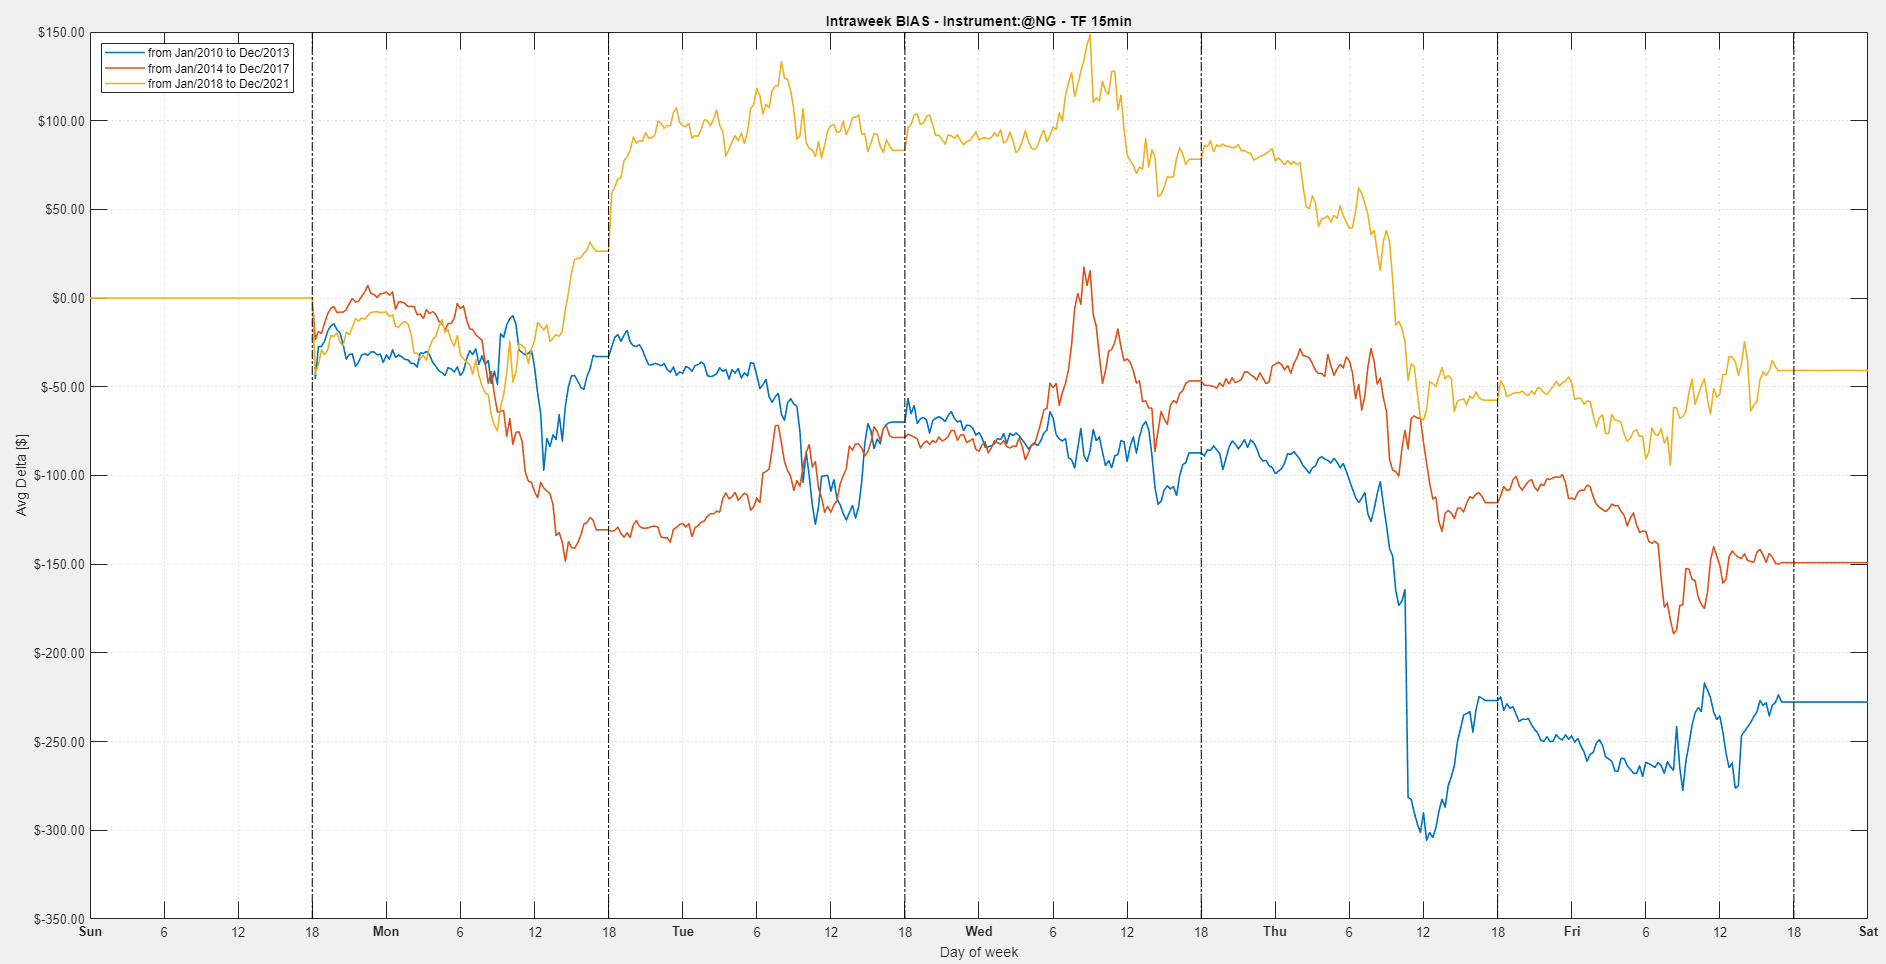

In [93]:
#  Requested Market News & Sentiment data using the required paramter function = NEWS_SENTIMENT, the optional parameter
#  topics = economy_macro to narrow in on economic sentiment and optional parameter limit = 1000 (default is 50).
#  To determine the time range available in the data, I didn't include a time frame but did include sort = EARLIEST to get the first articles 
#  available in the database, which were from 2022. Then I did the same thing but used sort = LATEST (also the default) to determine the 
#  upper time bound. From there, I used the optional parameters time_to and time_from in conjunction with sort = EARLIEST and 
#  sort = LATEST in order to create data ranges and pull as much data out of them as possible.

url_sentiment = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&topics=economy_macro&time_from=20240401T0000&time_to=20240430T0000&limit=1000&apikey=WNG1NK5I191GF4C4'
r_sentiment = requests.get(url_sentiment)
sentiment_json = r_sentiment.json()
sentiment_feed = sentiment_json['feed']

sentiment_feed

In [131]:
len(sentiment_feed)

1000

**6. Again, export the data to a separate CSV file**

This time, create a dictionary that contains ascending numerical keys, each with a nested dictionary that contains these three pieces of data for each article:
1. `title`
2. `overall_sentiment_score`
3. `overall_sentiment_label`

For example, the first key:value pair in the dictionary might look like this:

    {0: {'title': 'Better Buy: Apple vs. Coca-Cola',
    'overall_sentiment_score': 0.160455,
    'overall_sentiment_label': 'Somewhat-Bullish'}

In [94]:
# Created a new dictionary 'sentiments' using the keys requested (title, overall_sentiment_score and overall_sentiment_label) as well as
# time_published so that the data could be organized by time when visualizing it.

sentiments = {}
j_keys = ['title','time_published','overall_sentiment_score','overall_sentiment_label']

for i,j in enumerate(sentiment_feed):
    j_dict = {}
    
    for key in j_keys:
        if key in j:
            j_dict[key] = j[key]
    
    sentiments[i] = j_dict
 
        
sentiments

{0: {'title': 'Investment News: FTSE Hits All-Time High',
  'time_published': '20240423T151729',
  'overall_sentiment_score': 0.12676,
  'overall_sentiment_label': 'Neutral'},
 1: {'title': 'Dassault Systèmes Reports Solid First Quarter Results And Reaffirms Full-Year Objectives',
  'time_published': '20240425T045900',
  'overall_sentiment_score': 0.210507,
  'overall_sentiment_label': 'Somewhat-Bullish'},
 2: {'title': 'Is Invesco DB US Dollar Index Bullish ETF  ( UUP )  a Strong ETF Right Now?',
  'time_published': '20240424T102006',
  'overall_sentiment_score': 0.280434,
  'overall_sentiment_label': 'Somewhat-Bullish'},
 3: {'title': 'Taiwan Semiconductor Manufacturing  ( TSM )  Q1 2024 Earnings Call Transcript',
  'time_published': '20240418T123012',
  'overall_sentiment_score': 0.208973,
  'overall_sentiment_label': 'Somewhat-Bullish'},
 4: {'title': 'AIA new business value soars 27% as insurer adds $2 billion to buy-back plan',
  'time_published': '20240429T013000',
  'overall_se

In [95]:
# Downloaded the sentiment information as a dataframe in a CSV file without the metadata included. Made a new filename and download 
# for each time frame that I created. 

# choose something different from above
output_filename = "api_lab_sentiment_april24.csv"

# store your data in this variable:
sentiment_data = sentiments

# note we can use T to transpose our data and make it easier to read
sentiment_dataframe = pd.DataFrame(sentiment_data).T

# save the DataFrame to a csv
sentiment_dataframe.to_csv(output_filename, index=False)

# Part 2: Cryptocurrencies

Your stakeholders are becoming aware of the rise in cryptocurrencies, and would like to understand the recent growth of this market. Your task is to use the Alpha Vantage API to extract historical data on cryptocurrency market performance, and tell a story about their growth using visuals created in a BI tool of your choice (Tableau/Power BI).

**1. Find the correct API endpoints to retrieve historical data on cryptocurrency prices over time. Daily should be a sufficient level of granularity for your purposes.**

Use any specific cryptocurrency you wish (e.g. Bitcoin) against the US Dollar.

Use the [Documentation](https://www.alphavantage.co/documentation/) to help you.

In [ ]:
API Endpoint: DIGITAL_CURRENCY_DAILY

**2. Use Python to read the data as JSON**

In [100]:
# Requested crypto data using the required parameter function = DIGITAL_CURRENCY_DAILY and symbol, for which I chose DOGE (Dogecoin),
# and required parameter market, for which I chose USD. Repeated the process with ETH and BTC.

url_crypto = 'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=USD&apikey=WNG1NK5I191GF4C4'
r_crypto = requests.get(url_crypto)
crypto_json = r_crypto.json()

crypto_json

{'Meta Data': {'1. Information': 'Daily Prices and Volumes for Digital Currency',
  '2. Digital Currency Code': 'ETH',
  '3. Digital Currency Name': 'Ethereum',
  '4. Market Code': 'USD',
  '5. Market Name': 'United States Dollar',
  '6. Last Refreshed': '2024-06-19 00:00:00',
  '7. Time Zone': 'UTC'},
 'Time Series (Digital Currency Daily)': {'2024-06-19': {'1. open': '3482.07000000',
   '2. high': '3485.35000000',
   '3. low': '3464.44000000',
   '4. close': '3472.28000000',
   '5. volume': '1914.01326920'},
  '2024-06-18': {'1. open': '3509.81000000',
   '2. high': '3515.87000000',
   '3. low': '3351.00000000',
   '4. close': '3482.06000000',
   '5. volume': '129044.70825538'},
  '2024-06-17': {'1. open': '3622.53000000',
   '2. high': '3640.00000000',
   '3. low': '3463.38000000',
   '4. close': '3509.55000000',
   '5. volume': '111781.88622712'},
  '2024-06-16': {'1. open': '3566.82000000',
   '2. high': '3651.51000000',
   '3. low': '3538.74000000',
   '4. close': '3622.10000000'

**3. Identify the key which holds the data itself and use the boilerplate code below to export it to a CSV**

For this particular dataset we need to do just a little bit more transformation before being able to export, hence this boilerplate code.

In [99]:
# Downloaded the crypto information as a dataframe in a CSV file as per the instructions.

# give your file a name
output_filename = "api_lab_crypto_eth.csv"

# find the key that contains the data:
crypto_data = crypto_json['Time Series (Digital Currency Daily)'] 

# some additional transformation to ensure we have a "date" column in the exported data
crypto_dataframe = pd.DataFrame(crypto_data)
crypto_dataframe = crypto_dataframe.transpose()
crypto_dataframe.to_csv(output_filename, index=True, index_label="date")